<a href="https://colab.research.google.com/github/Sung4ji3/comp215/blob/main/labs/lab04-more_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 4
----------------
#### Name(s): Marcus Leung
#### Date: February 18 2025

By the end of this lab you should be able to:
  * use composition and inheritance in a `class` to categorize related information


During this lab, you will be introduced to the following:
  * something, something



## Near Earth Objects (with more classes)

We'll continue working with Near Earth Object data using NASA's API: https://api.nasa.gov/.  In Lab 3 we defined an Asteroid class that contained a simple data structure.  In this lab, we will be Here's a brief review from Lab 2 on how to use the API.  

In [25]:
# import necessary modules
import json, requests
from datetime import datetime
from pprint import pprint
from dataclasses import dataclass, field
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Review: make an API query

Here's a query that gets the record for a single NEO that recently passed by.

In [26]:
#API_KEY = 'DEMO_KEY'  # substitute your API key here
API_KEY = 'QMU73gySBTeUk6FVRje8eMwNOFfI1FZOwRtlf0Xo'

def get_neos(start_date):
    """ Return a list of NEO for the week starting at start_date """
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&api_key={API_KEY}'
    # Fetch last week's NEO feed
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    #pprint(data)
    print(f'{data["element_count"]} Near Earth Objects found for week of {start_date}')
    return [neo for dated_records in data['near_earth_objects'].values() for neo in dated_records ]

def get_neo(id):
    """ Return a NEO record for the given id """
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    return json.loads(response.text)

week_start = '2023-01-15'
neos = get_neos(week_start)
assert len(neos) > 0, f'Oh oh!  No NEOs found for {week_start}'
neo = get_neo(neos[-1]['id'])  # get the very latest NEO
print(f"Record for NEO ID {neos[-1]['id']} is:")
pprint(neo)

117 Near Earth Objects found for week of 2023-01-15
Record for NEO ID 54339874 is:
{'absolute_magnitude_h': 24.86,
 'close_approach_data': [{'close_approach_date': '1949-07-04',
                          'close_approach_date_full': '1949-Jul-04 22:19',
                          'epoch_date_close_approach': -646710060000,
                          'miss_distance': {'astronomical': '0.419726307',
                                            'kilometers': '62790161.51016609',
                                            'lunar': '163.273533423',
                                            'miles': '39015997.166588442'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '73509.6739172087',
                                                'kilometers_per_second': '20.4193538659',
                                                'miles_per_hour': '45676.0526626122'}},
                         {'close_approach_date': '1950-0

## Exercise 1: Define a CloseApproach class

Each NEO record comes with a list of `close_approach_data`, where each record in this list represents a single “close approach” to another orbiting body.
1. Develop a class named `CloseApproach` to represent a single close approach record.  State variables are

        neo (refrence to related NEO object)
        orbiting body (str)
        approach date (datetime object!)
        miss distance (float - choose units, document it, and be consistent!)
        relative velocity (ditto)
  
2. Define a "Factory" class method to construct a `CloseApproach` object from one close approach data record (a dictionary object). This method takes a `neo` object as input for the NEO to which the close approach data belongs. Remember to parse the date/time string into a datetime object.

In [27]:
@dataclass
class CloseApproach:
  neo: object
  orbitingbody: str
  approachdate: object
  missdist_km: float
  relvel_kph: float

  def __str__(self):
    return f'neo:{self.neo}, orbitingbody:{self.orbitingbody}, approachdate:{self.approachdate}, missdist_km:{self.missdist_km}, relvel_kph:{self.relvel_kph}'

  def __repr__(self):
    return (self.neo, self.orbitingbody, self.approachdate, self.missdist_km, self.relvel_kph)

  @classmethod
  def CAOfactory(cls, neo):
    NEOtuple = asteroid.__repr__(neo)
    neo_id = NEOtuple[0]
    entire_neo = get_neo(neo_id)
    entire_CAD_list = entire_neo['close_approach_data']
    neo_event = closestdate(entire_CAD_list, week_start)
    neo_event_entry = [entry for entry in entire_CAD_list if entry['close_approach_date'] == neo_event]
    orbitingbody = neo_event_entry[0]['orbiting_body']
    approachdate = neo_event
    missdist_km = float(neo_event_entry[0]['miss_distance']['kilometers'])
    relvel_kph = float(neo_event_entry[0]['relative_velocity']['kilometers_per_hour'])
    givenCAO = cls(neo.__repr__(), orbitingbody, approachdate, missdist_km, relvel_kph)
    return givenCAO


## Exercise 2: Add list of CloseApproach objects to the Asteroid

Define an `Asteroid` class, like you did in Lab 3, but give the `Asteroid` list of “close approaches”.  This is called *composition* because each Asteroid object will be *composed* of CloseApproach objects (plus some other things).  There is bit of a catch-22 here because we need the `Asteroid` to construct the `CloseApproach` objects. The first two steps deal with that:

1. Add an instance variable to your Asteroid class with a default value of an empty list:

    ```
    close_approaches:list = []
    ```
      
2. In the Asteroid `from_NEO` factory, use a list comprehension to build the list of `CloseApproach` objects for the Asteroid instance, and then set the instance's `close_approaches` variable before returning it. Setting the value of an object's instance variables from outside the class is generally frowned upon - this is why we make the factory a method of the class itself.

3. Add a method to `Asteroid` to return the `CloseApproach` object for the nearest miss (ie. smallest `missed_distance`):
    ```
    def nearest_miss(self):
        ...
    ```

4. Add a method to the Asteroid class, `closest_earth_approach`, that returns the CloseApproach object that represents the closest approach the Asteroid makes to Earth.
    ```
    def closest_earth_approach(self):
        ...
    ```

Write some test code to demonstrate these new features.

In [28]:
@dataclass
class asteroid():
  id: str
  name: str
  m_est_diam_m: float
  ishazard: bool
  close_approaches: list = field(default_factory=lambda: []) # https://stackoverflow.com/a/52064202

  def __str__(self):
    return f'id: {self.id}, name: {self.name}, minimum estimated diameter in meters: {self.m_est_diam_m}, is potential hazard: {self.ishazard}, close_approaches:{self.close_approaches}'

  def __repr__(self):
    return (self.id, self.name, self.m_est_diam_m, self.ishazard, self.close_approaches)

  def __call__(self):
    return self

  @classmethod
  def identified_NEO(cls, neo_id):
    got_neo = get_neo(neo_id)
    id = got_neo['id']
    name = got_neo['name']
    m_est_diam_m = got_neo['estimated_diameter']['meters']['estimated_diameter_min']
    ishazard = got_neo['is_potentially_hazardous_asteroid']
    close_approaches = [entry for entry in got_neo['close_approach_data']]
    givenNEO = cls(id, name, m_est_diam_m, ishazard, close_approaches)
    return givenNEO

  @classmethod
  def nearest_miss(cls):
    numlist = [float(entry['miss_distance']['kilometers']) for entry in self.close_approaches]
    smallest_dist = min(numlist)
    smallest_dist_entry = [entry for entry in self.close_approaches if entry['miss_distance']['kilometers'] == str(smallest_dist)]
    neo = asteroid.identified_NEO(self.id)
    orbitingbody =  smallest_dist_entry[0]['orbiting_body']
    approachdate = smallest_dist_entry[0]['close_approach_date'] #this means that nearest_miss is a different factory from CAOfactory, because there is only one date to choose from (the day of the nearest miss)
    missdist_km = float(smallest_dist_entry[0]['miss_distance']['kilometers'])
    relvel_kph = float(smallest_dist_entry[0]['relative_velocity']['kilometers_per_hour'])
    return CloseApproach(neo.__repr__(), orbitingbody, approachdate, missdist_km, relvel_kph)

def closestdate(datelist, start_date):
  """
  A helper-function for the CAOfactory class method that:
    1. Takes a list of dates from one close-approach-data record and the day used as the start_date in the get_neos function, with every date represented as a string with YYYY-MM-DD formatting
    2. Converts every date in the list and the start_date from string-form to datetime-object form
    3. Sorts the datetime-object list by least to most distant in time from the start_date
    4. Grabs the datetime-object that has the smallest difference between itself and the start_date, and then converts it back into string form to return
  """
  dateobjlist = [datetime.strptime(entry['close_approach_date'], '%Y-%m-%d') for entry in datelist]
  startdateobj = datetime.strptime(start_date, '%Y-%m-%d')
  closestdateobj = min(dateobjlist, key=lambda date: abs(date - startdateobj))
  closestday = closestdateobj.strftime('%Y-%m-%d')
  return closestday

## Exercise 3: Plot the Closest Approaches

Write a function that takes an Asteroid object as a parameter and makes a timeline plot of close approaches.  You may wish to use the `matplotlib.pyplot` `plot` object.  Here is an example of a timeline plot for the asteroid with neo id '54339874'

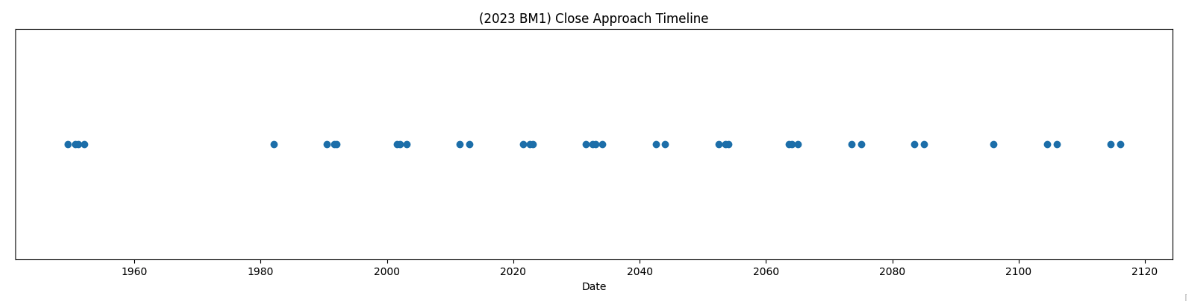

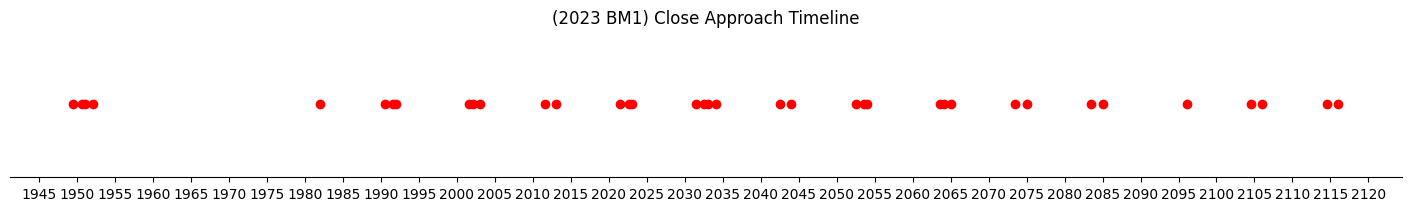

In [29]:
import numpy as np
def CAtimeline(aster):
  """Takes an asteroid object and graphs the dates of its close approach events as dots along a horizon axis of years (by increments of 5)."""
  fig, ax = plt.subplots(figsize=(14, 2), layout="constrained")
  ax.set_title(f'{aster.name} Close Approach Timeline')
  eventdates = [entry['close_approach_date'] for entry in aster.close_approaches]
  eventdateobjs = [datetime.strptime(date, "%Y-%m-%d") for date in eventdates]
  ax.xaxis.set(major_locator=mdates.YearLocator(base=5), major_formatter=mdates.DateFormatter("%Y"))
  ax.yaxis.set_visible(False)
  ax.spines[["left", "top", "right"]].set_visible(False)
  ax.margins(y=0.1)
  ax.plot(eventdateobjs, np.zeros_like(eventdateobjs), 'ro')
  plt.show()

fetched = asteroid.identified_NEO('54339874')
CAtimeline(fetched)

## Challenge - Take your skills to the next level...

 With these data structures in place, we can now start answering all kinds of interesting questions about a single Asteroid or a set of Asteroids.  
Here’s a couple ideas to try:



* write a **function** named `most_dangerous_approach`, that takes a date range and returns a single “potentially hazardous” Asteroid object that makes the closest approach to Earth in within that range.  Your algorithm will ultimately need to:
    * grab the list of NEO’s for the given date range;
    * use a list comprehension to build the list of Asteroid objects for the NEO’s returned
    * use a list comprehension to filter  potentially hazardous Asteroids only;
    * use a list comprehension to map each Asteroid to its  closest_earth_approach
    * apply Python’s min function to identify the Asteroid with the closest_earth_approach

You may want to decompose some of these steps into smaller functions.
* add a method to the Asteroid class, estimated_mass, that computes an estimate of the Asteroid’s mass based on its diameter.  This is a model – state your assumptions.
* add a method to the CloseApproach class, impact_force,  that estimates the force of impact if the Asteroid hit the orbiting object.  Again, this is a model, state your assumptions.

In [30]:
# Ex. 5 (challenge) your code here